# Matplotlib API refresher

In [10]:
% matplotlib notebook
import matplotlib.pyplot as plt

## Matplotlib "stateful" api
Modifies "current figure"

<IPython.core.display.Javascript object>


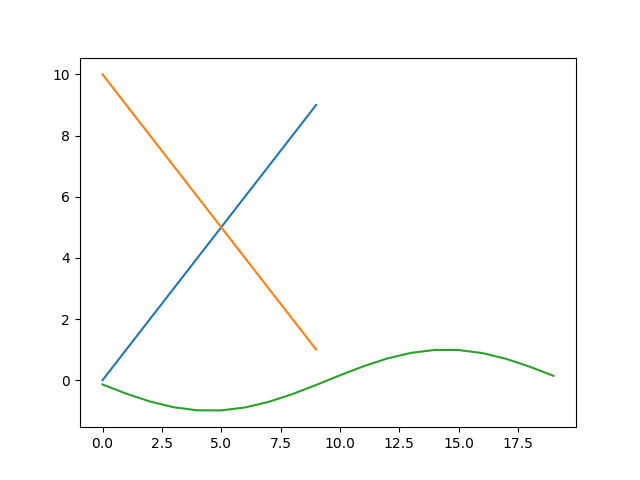

In [11]:
plt.plot(range(10))
plt.plot(range(10, 0, -1))

In [12]:
import numpy as np
plt.plot(np.sin(np.linspace(-3, 3, 20)))

## Works also with subplot

<IPython.core.display.Javascript object>


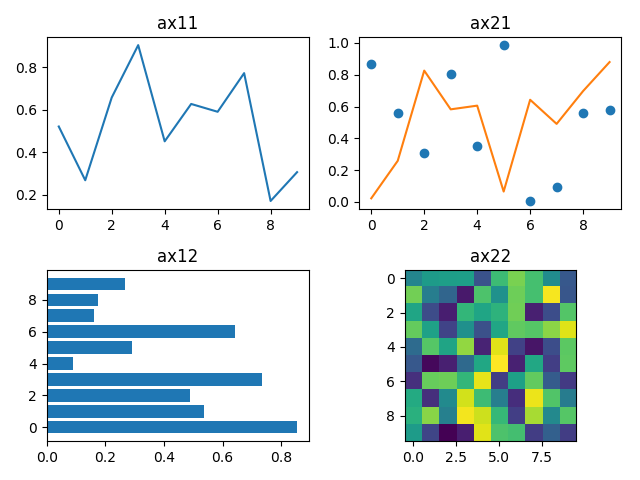

In [18]:
plt.figure()
# create a subplot by specifying grid width, grid height and index:
# 2x2 grid, first plot (one-indexed)
plt.subplot(2, 2, 1)
# plt.title changes "current axes"
plt.title("first plot")
plt.plot(np.random.uniform(size=10))

plt.subplot(2, 2, 2)
# now subplot 2 is current
plt.title("second plot")
plt.plot(np.random.uniform(size=10), 'o')

plt.subplot(2, 2, 3)
plt.title("third plot")
plt.barh(range(10), np.random.uniform(size=10))

plt.subplot(2, 2, 4)
plt.title("fourth plot")
plt.imshow(np.random.uniform(size=(10, 10)))
plt.tight_layout()

## Object oriented / Axis oriented API is more powerful
Have an object per axes, plot directly to axes.

methods modifying the axes have ``set_``!

<IPython.core.display.Javascript object>


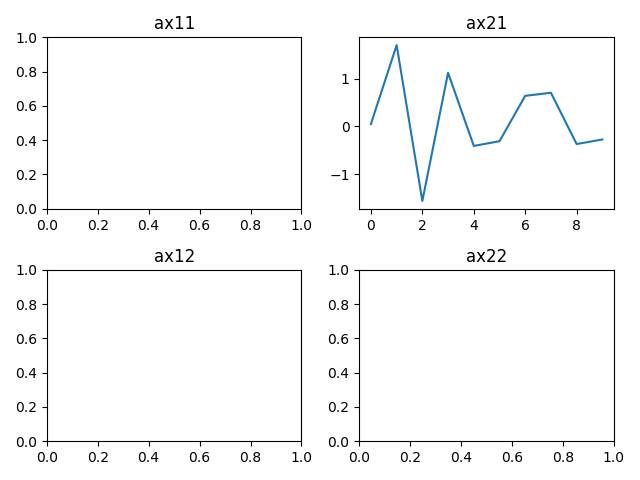

In [23]:
plt.figure()
ax11 = plt.subplot(2, 2, 1)
ax21 = plt.subplot(2, 2, 2)
ax12 = plt.subplot(2, 2, 3)
ax22 = plt.subplot(2, 2, 4)

ax11.set_title("ax11")
ax21.set_title("ax21")
ax12.set_title("ax12")
ax22.set_title("ax22")

ax21.plot(np.random.randn(10))
plt.tight_layout()

In [24]:
## My favorite interface: plt.subplots!

<IPython.core.display.Javascript object>


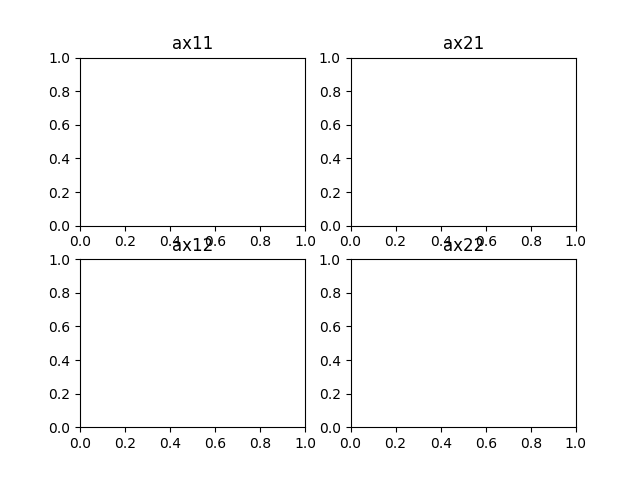

In [3]:
fig, axes = plt.subplots(2, 2)
ax11, ax21, ax12, ax22 = axes.ravel()
ax11.set_title("ax11")
ax21.set_title("ax21")
ax12.set_title("ax12")
ax22.set_title("ax22")

## Exercise
Create a grid plot with one row and four columns where the first entry plots the function ``f(x) = x``, the second ``f(x)=x ** 2``, the third ``f(x)=x ** 3`` and the fourth ``f(x)=x**4``.

In [ ]:
# Your solution


<IPython.core.display.Javascript object>


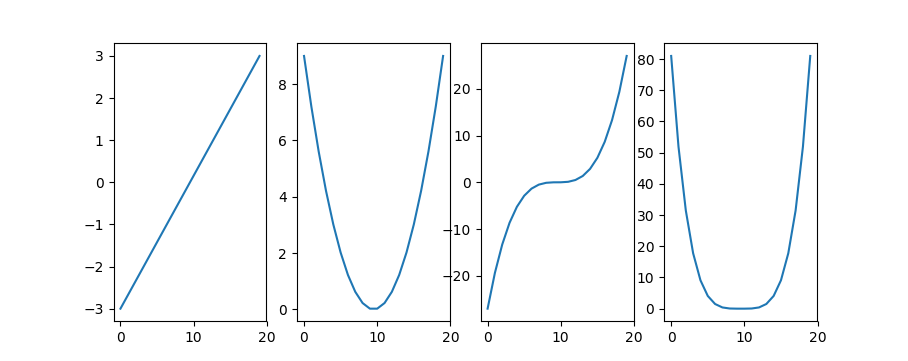

In [28]:
fig, axes = plt.subplots(1, 4)
line = np.linspace(-3, 3, 20)
for i, ax in enumerate(axes):
    ax.plot(line ** (i + 1))

##  More fun with subplots!

<IPython.core.display.Javascript object>


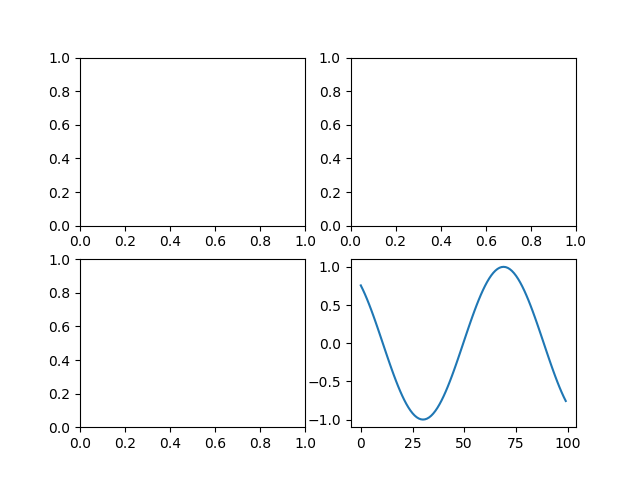

In [29]:
import numpy as np
sin = np.sin(np.linspace(-4, 4, 100))
fig, axes = plt.subplots(2, 2)
plt.plot(sin)

<IPython.core.display.Javascript object>


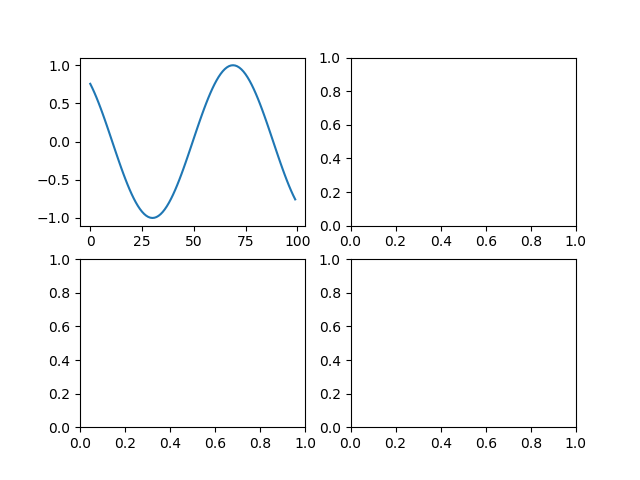

In [30]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(sin)

In [33]:
asdf = plt.gca()
asdf.plot(sin, c='k')

## More on plotting commands and styling

<IPython.core.display.Javascript object>


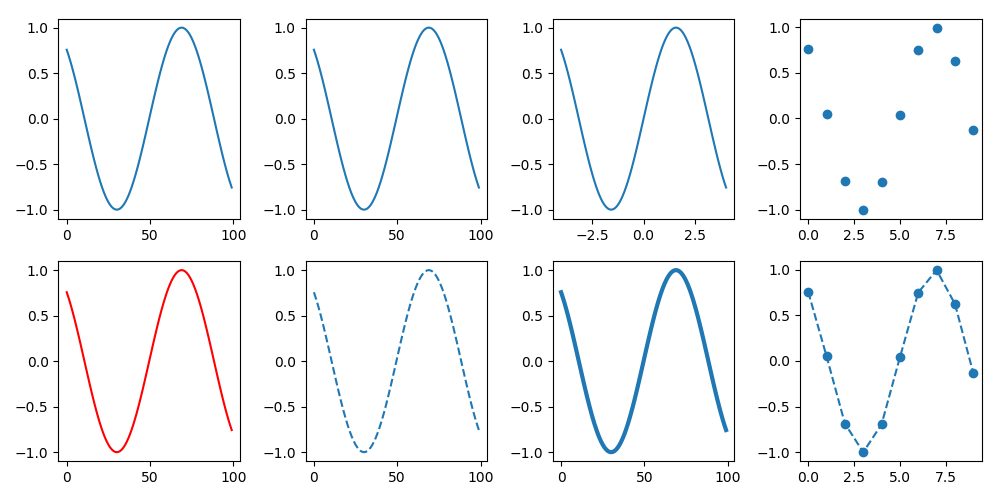

In [35]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
ax[0, 0].plot(sin)
ax[0, 1].plot(range(100), sin)  # same as above
ax[0, 2].plot(np.linspace(-4, 4, 100), sin)
ax[0, 3].plot(sin[::10], 'o')
ax[1, 0].plot(sin, c='r')
ax[1, 1].plot(sin, '--')
ax[1, 2].plot(sin, lw=3)
ax[1, 3].plot(sin[::10], '--o')
plt.tight_layout() # makes stuff fit - usually works

# Exercise
See how many lines you can put in a plot an still distinguish them (using the styles described above).
How many can you distinguish if you don't use color?
See the [lines bars and markers](https://matplotlib.org/gallery.html#lines_bars_and_markers) section of the matplotlib examples for more different styles

In [49]:
# solution

### Scatter vs plot
Scatter allows modifying individual points, plot only allows modifying them all the same way:

<IPython.core.display.Javascript object>


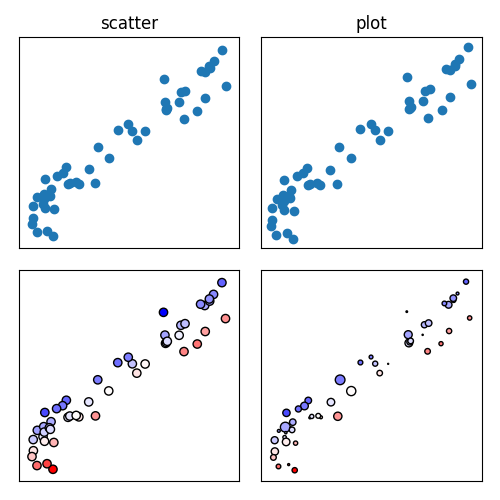

In [36]:
x = np.random.uniform(size=50)
y = x + np.random.normal(0, .1, size=50)

fig, ax = plt.subplots(2, 2, figsize=(5, 5),
                       subplot_kw={'xticks': (), 'yticks': ()})
ax[0, 0].scatter(x, y)
ax[0, 0].set_title("scatter")
ax[0, 1].plot(x, y, 'o')
ax[0, 1].set_title("plot")
ax[1, 0].scatter(x, y, c=x-y, cmap='bwr', edgecolor='k')
ax[1, 1].scatter(x, y, c=x-y, s=np.abs(np.random.normal(scale=20, size=50)), cmap='bwr', edgecolor='k')
plt.tight_layout()

# Imshow, interpolation, colormaps
- three important kinds of color maps: sequential, diverging, qualitative
- default colormap: viridis
- default qualitative colormap: tab10

In [37]:
from matplotlib.cbook import get_sample_data
f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
arr = np.load(f)

<IPython.core.display.Javascript object>


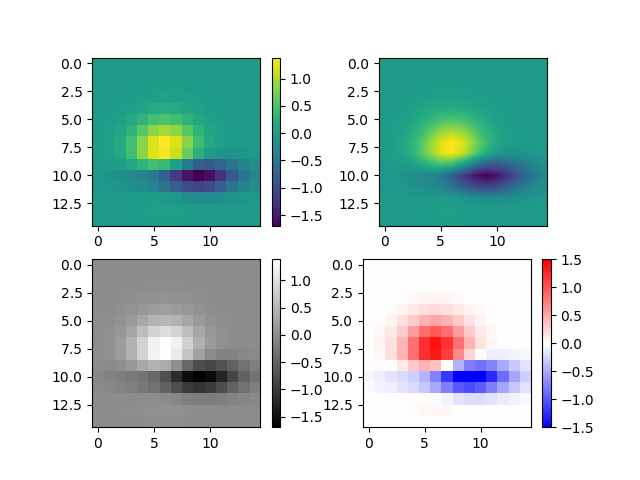

In [38]:
fig, ax = plt.subplots(2, 2)
im1 = ax[0, 0].imshow(arr)
ax[0, 1].imshow(arr, interpolation='bilinear')
im3 = ax[1, 0].imshow(arr, cmap='gray')
im4 = ax[1, 1].imshow(arr, cmap='bwr', vmin=-1.5, vmax=1.5)
plt.colorbar(im1, ax=ax[0, 0])
plt.colorbar(im3, ax=ax[1, 0])
plt.colorbar(im4, ax=ax[1, 1])

## The problem of overplotting

In [40]:
x1, y1 = 1 / np.random.uniform(-1000, 100, size=(2, 10000))
x2, y2 = np.dot(np.random.uniform(size=(2, 2)), np.random.normal(size=(2, 1000)))
x = np.hstack([x1, x2])
y = np.hstack([y1, y2])

<IPython.core.display.Javascript object>


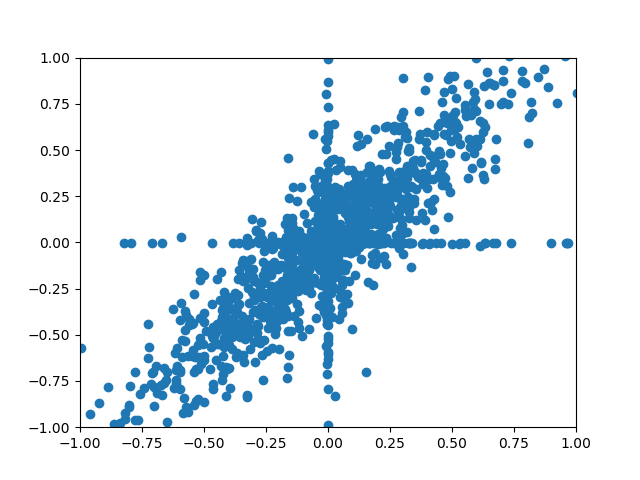

In [41]:
plt.figure()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(x, y)

<IPython.core.display.Javascript object>


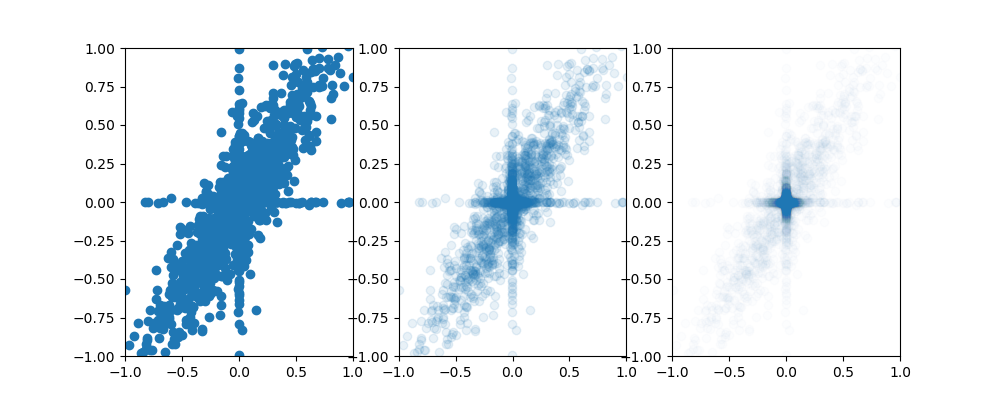

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4),
                       subplot_kw={'xlim': (-1, 1),
                                   'ylim': (-1, 1)})
ax[0].scatter(x, y)
ax[1].scatter(x, y, alpha=.1)
ax[2].scatter(x, y, alpha=.01)

<IPython.core.display.Javascript object>


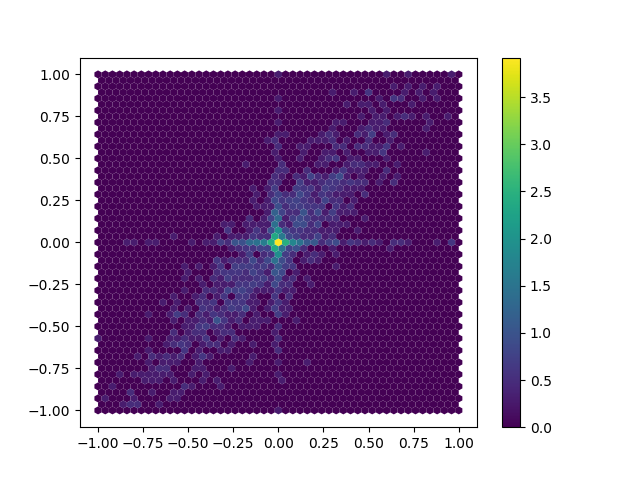

In [47]:
plt.figure()
plt.hexbin(x, y, bins='log', extent=(-1, 1, -1, 1), gridsize=50, linewidths=0)
plt.colorbar()

# Twinx

In [246]:
df = pd.DataFrame({'Math PhDs awareded (US)': {'2000': 1050,
  '2001': 1010,
  '2002': 919,
  '2003': 993,
  '2004': 1076,
  '2005': 1205,
  '2006': 1325,
  '2007': 1393,
  '2008': 1399,
  '2009': 1554},
 'Total revenue by arcades (US)': {'2000': 1196000000,
  '2001': 1176000000,
  '2002': 1269000000,
  '2003': 1240000000,
  '2004': 1307000000,
  '2005': 1435000000,
  '2006': 1601000000,
  '2007': 1654000000,
  '2008': 1803000000,
  '2009': 1734000000}})

<IPython.core.display.Javascript object>


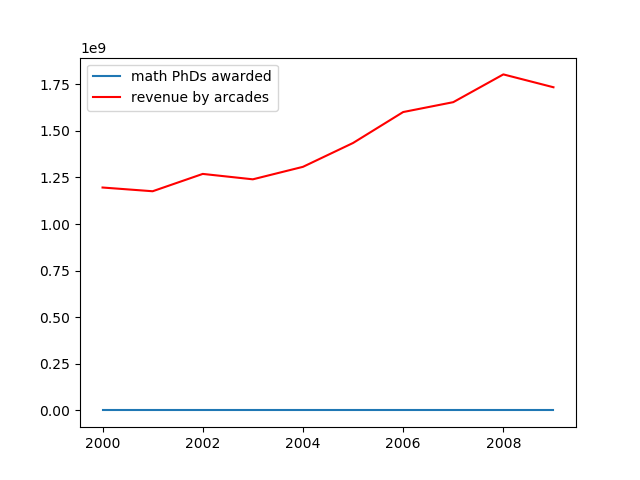

In [263]:
# could also do df.plot()
phds = df['Math PhDs awareded (US)']
revenue = df['Total revenue by arcades (US)']
years = df.index

plt.figure()
ax1 = plt.gca()
line1, = ax1.plot(years, phds)
line2, = ax1.plot(years, revenue, c='r')
plt.legend((line1, line2), ("math PhDs awarded", "revenue by arcades"))

<IPython.core.display.Javascript object>


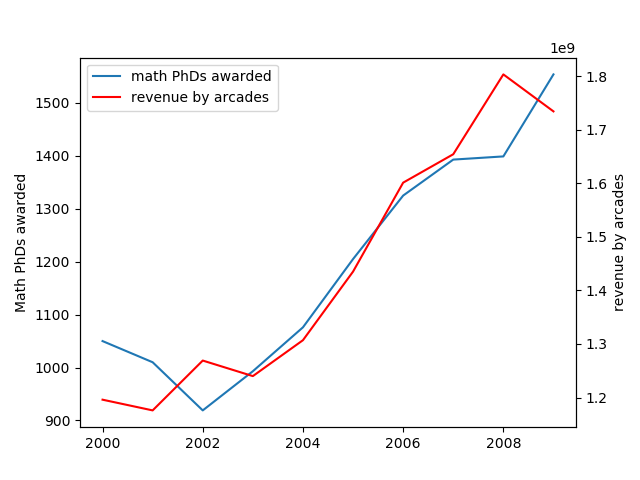

In [262]:
plt.figure()
ax1 = plt.gca()
line1, = ax1.plot(years, phds)
ax2 = ax1.twinx()
line2, = ax2.plot(years, revenue, c='r')
plt.legend((line1, line2), ("math PhDs awarded", "revenue by arcades"))
ax1.set_ylabel("Math PhDs awarded")
ax2.set_ylabel("revenue by arcades")

# Exercise
Get another dataset from http://www.tylervigen.com/spurious-correlations and plot it using ``twinx``.